Original dimensions: 64
Reduced dimensions: 28
Original accuracy: 0.9861
Reduced accuracy: 0.9861


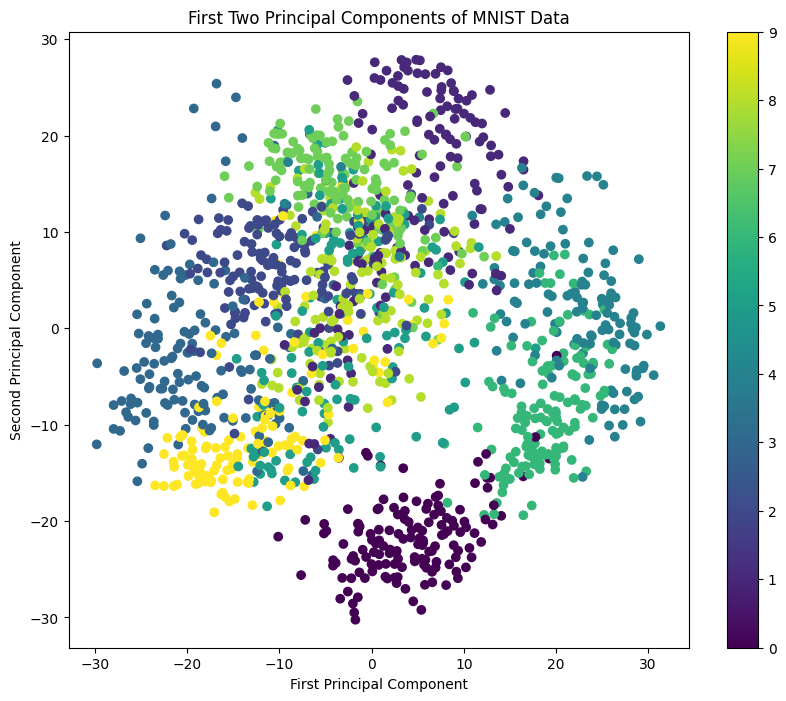

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
digits = load_digits()
X, y = digits.data, digits.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train SVM and get accuracy
def train_svm(X_train, X_test, y_train, y_test):
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Original accuracy
original_accuracy = train_svm(X_train, X_test, y_train, y_test)

# PCA reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Reduced accuracy
reduced_accuracy = train_svm(X_train_pca, X_test_pca, y_train, y_test)

print(f"Original dimensions: {X_train.shape[1]}")
print(f"Reduced dimensions: {X_train_pca.shape[1]}")
print(f"Original accuracy: {original_accuracy:.4f}")
print(f"Reduced accuracy: {reduced_accuracy:.4f}")

# Visualize first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.colorbar()
plt.title("First Two Principal Components of MNIST Data")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()